In [ ]:
import glob
import pandas as pd
import numpy as np
import torch
from google.colab import drive
from sklearn.model_selection import train_test_split
import math
from statistics import mean
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
drive.mount('/content/drive')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Mounted at /content/drive


#Tumor

In [ ]:
df_tumor_1 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_1_coding.csv')
df_tumor_1

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,3.145254,-9.965784,6.301474,1.506500,2.677914,2.449403,3.445303,5.412324,2.358621,3.361853,...,-9.965784,-7.039785,-1.560217,-9.965784,-9.965784,-9.965784,-9.965784,-6.795859,-3.687800,1
786,2.903231,-9.965784,4.858289,1.243425,0.823586,2.041523,3.680358,4.943753,6.735640,3.864315,...,-9.965784,-6.844769,-4.594225,-9.965784,-9.965784,-9.965784,-9.965784,-5.665661,-1.280335,1
787,3.352674,-9.965784,4.714559,0.845751,0.248535,3.338895,4.015060,4.427633,0.664574,3.323817,...,-9.965784,-9.965784,0.236952,-9.965784,-9.965784,-9.965784,-9.965784,-5.921390,-2.751465,1
788,3.166426,-4.559792,5.055204,1.541862,1.183455,1.795808,1.982583,4.856777,4.251734,3.408236,...,-9.965784,-9.965784,-1.970300,-5.107803,-9.965784,-9.965784,-9.965784,-6.429731,-1.361416,1


In [ ]:
df_tumor_2 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_2_coding.csv')
df_tumor_2

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,2.353126,-0.283141,4.345361,2.874482,1.831391,2.604024,3.878627,3.251977,4.392372,4.089091,...,-9.965784,-5.615287,-4.265345,-9.965784,-9.965784,-9.965784,-9.965784,-4.155855,-1.881507,1
1,4.111282,-1.049905,4.319343,2.489414,1.172167,2.391245,4.892877,3.775588,1.486611,4.137667,...,-9.965784,-4.779918,-2.834442,-2.973696,-9.965784,-9.965784,-9.965784,-4.290533,-1.604718,1
2,2.943715,-2.706512,4.457456,2.455728,1.304044,2.468557,4.002162,3.890923,1.172872,3.354339,...,-9.965784,-6.764150,-4.496549,-9.965784,-9.965784,-9.965784,-9.965784,-6.127841,-3.373327,1
3,3.184820,-3.236503,4.534354,1.584289,1.332221,2.747967,4.243677,2.878058,6.511321,3.134550,...,-9.965784,-3.851001,-4.039785,-9.965784,-9.965784,-7.243318,-9.965784,-5.526161,-1.654717,1
4,4.399151,-4.787866,4.936007,1.713256,1.590051,2.649202,2.293076,3.720880,7.084592,3.133580,...,-9.965784,-9.965784,-1.309359,-9.965784,-9.965784,-9.965784,-9.965784,-5.861448,-1.427013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
785,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
786,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
787,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [ ]:
df_tumor = pd.concat([df_tumor_1, df_tumor_2], axis=0, ignore_index=True)
df_tumor

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
1575,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
1576,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
1577,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [ ]:
X = df_tumor.drop('tumor', axis=1)

In [ ]:
X_tumor = X

#Normal

In [ ]:
df_normal = pd.read_csv('/content/drive/MyDrive/lung/lung_normal_coding.csv')
df_normal

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.741855,-3.582080,4.487744,2.227464,0.619929,4.408603,3.924242,3.727376,2.603312,3.131096,...,-9.965784,-5.351074,-3.269512,-2.568324,-9.965784,-6.861448,-9.965784,-4.030325,-3.187050,0
418,2.905447,-2.944527,4.775999,2.173863,0.614286,3.906843,5.260786,3.542456,1.790105,3.017726,...,-9.965784,-6.532825,-4.662004,-9.965784,-9.965784,-9.965784,-9.965784,-3.791857,-3.129103,0
419,2.286112,-3.334971,4.482906,1.199625,-0.432844,4.743537,5.973593,4.443898,1.535804,2.917031,...,-9.965784,-6.601212,-0.509225,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-3.519528,0
420,2.502203,-1.708396,4.277464,1.931986,0.525868,4.049622,4.844978,3.213938,1.471708,3.064745,...,-9.965784,-9.965784,-6.200250,-9.965784,-9.965784,-9.965784,-9.965784,-4.643856,-2.888969,0


In [ ]:
X = df_normal.drop('tumor', axis=1)

In [ ]:
X_normal = X

#Build whole dataframe

In [ ]:
df = pd.concat([df_normal, df_tumor_1, df_tumor_2], axis=0, ignore_index=True)
df

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
1997,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
1998,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
1999,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [ ]:
#shuffle
df = df.sample(frac=1).reset_index(drop=True)
df

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.296795,-3.135428,4.401378,2.237135,1.354960,2.118393,4.973143,3.741596,3.220964,3.835389,...,-9.965784,-6.030325,-1.780909,-3.114035,-9.965784,-9.965784,-9.965784,-5.210897,-2.327710,1
1,4.228465,-9.965784,5.198030,0.685716,0.701860,0.304277,2.177886,3.825033,6.649828,3.292752,...,-9.965784,-7.158429,-1.026499,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-0.606474,1
2,3.630930,-9.965784,5.326016,1.887681,1.845510,2.035941,3.202120,4.085883,3.519504,3.359999,...,-9.965784,-9.965784,-4.251539,-5.756331,-9.965784,-9.965784,-9.965784,-6.429731,-2.943416,1
3,4.064616,-9.965784,6.349096,1.275782,0.884637,2.739827,3.061223,5.025476,4.483629,3.567436,...,-9.965784,-7.480357,-2.155855,-9.965784,-9.965784,-9.965784,-9.965784,-5.974829,-1.226004,1
4,3.871755,-9.965784,4.816159,1.615746,0.352081,1.537743,3.262794,3.622263,2.832060,3.792741,...,-9.965784,-9.965784,-3.488431,-9.965784,-9.965784,-9.965784,-9.965784,-6.828281,-1.488026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,4.201218,-3.917025,5.904407,2.002667,1.988921,1.858777,4.751780,4.124328,3.456622,3.413702,...,-9.965784,-9.965784,0.425137,-9.965784,-9.965784,-6.779918,-9.965784,-6.506353,-2.380071,1
1997,5.258285,-5.184425,5.102053,2.821731,0.455649,4.052990,4.310558,4.016906,0.576087,3.107470,...,-9.965784,-9.965784,-4.622376,-9.965784,-9.965784,-9.965784,-9.965784,-4.583809,-4.392895,1
1998,2.953079,-3.183114,4.965055,1.847997,1.494364,3.485710,4.264341,3.300856,5.291198,3.450367,...,-9.965784,-6.287712,-1.252913,-4.938984,-9.965784,-9.965784,-9.965784,-6.930160,-2.481969,1
1999,4.201414,-9.965784,5.258006,1.329066,0.951961,1.627794,4.148080,3.321971,3.807231,3.386342,...,-9.965784,-7.764150,-1.275786,-9.965784,-9.965784,-7.764150,-9.965784,-6.467533,-2.627716,1


In [ ]:
y = df['tumor']
X = df.drop('tumor', axis=1)

#LOAD LINKS

In [ ]:
links = pd.read_csv('/content/drive/MyDrive/lung/link_index.csv').drop('Unnamed: 0', axis=1)
links

,index1,score,index
0,1,241,0
1,57,186,0
2,75,163,0
3,109,196,0
4,118,248,0
...,...,...,...
13479485,19538,188,19952
13479486,19540,222,19952
13479487,19565,152,19952
13479488,19904,204,19952


In [ ]:
edge_index = torch.tensor([links['index'],links['index1']])
edge_index.shape

torch.Size([2, 13479490])

In [ ]:
edge_index

tensor([[    0,     0,     0,  ..., 19952, 19952, 19952],
        [    1,    57,    75,  ..., 19565, 19904, 19907]])

#KMEANS



In [ ]:
b = pd.read_csv('/content/drive/MyDrive/lung/louvain_complete.csv', sep=',')
b

,node,community
0,0,0
1,1,0
2,57,1
3,75,2
4,109,0
...,...,...
19197,18047,5
19198,19816,1
19199,17466,0
19200,17959,0


In [ ]:
x_normal = X_normal.transpose()
x_normal['node'] = [i for i in range(X_normal.shape[1])]
x_normal

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,node
ENSG00000000003.15,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,2.993221,...,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704,0
ENSG00000000005.6,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,-0.926865,...,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293,1
ENSG00000000419.13,4.542147,4.511342,4.282173,4.582514,4.474137,4.006917,4.312868,4.665722,4.256611,4.495785,...,4.728405,4.475623,4.080112,4.359367,4.487744,4.775999,4.482906,4.277464,4.384478,2
ENSG00000000457.14,1.132050,1.998593,1.180339,1.694212,1.192005,2.005580,2.174566,1.888811,0.815411,1.862154,...,1.635987,1.515460,2.322822,0.219215,2.227464,2.173863,1.199625,1.931986,2.185708,3
ENSG00000000460.17,-1.118414,0.231924,-0.991370,0.110898,-0.742024,0.311387,0.667120,0.526970,-0.979942,0.366924,...,-0.072938,0.115300,0.795434,-1.186722,0.619929,0.614286,-0.432844,0.525868,0.534261,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19957
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-6.748554,-6.930160,-6.878321,-9.965784,-6.861448,-9.965784,-9.965784,-9.965784,-9.965784,19958
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19959
ENSG00000288674.1,-6.049308,-4.608232,-9.965784,-5.844769,-6.493297,-4.853084,-3.880445,-4.680382,-4.710284,-4.095420,...,-4.684086,-4.351074,-4.221623,-6.254289,-4.030325,-3.791857,-5.293359,-4.643856,-5.748554,19960


In [ ]:
x_tumor = X_tumor.transpose()
x_tumor['node'] = [i for i in range(X_tumor.shape[1])]
x_tumor

,0,1,2,3,4,5,6,7,8,9,...,1570,1571,1572,1573,1574,1575,1576,1577,1578,node
ENSG00000000003.15,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,5.465037,...,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155,0
ENSG00000000005.6,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,-3.945638,...,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784,1
ENSG00000000419.13,5.172844,5.505129,4.876036,4.125254,4.531756,5.085820,4.541434,4.415468,4.994652,5.753048,...,4.802736,5.170674,4.460494,4.490936,5.458950,4.806401,3.840856,4.549663,4.916997,2
ENSG00000000457.14,1.602267,0.720629,0.443076,1.106549,2.968423,1.823505,1.943509,1.143785,1.603264,0.981633,...,1.247502,1.433974,2.390998,2.278788,1.390503,2.202700,2.528996,0.432425,1.650581,3
ENSG00000000460.17,2.895497,1.305737,0.660746,-0.166341,2.185549,0.072037,0.863146,-0.531782,1.125783,1.988157,...,0.612494,1.109494,2.036152,1.112433,0.803310,1.007985,0.847356,0.505078,1.350158,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288661.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19957
ENSG00000288669.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-5.710284,-6.828281,-9.965784,-7.137965,-9.965784,-9.965784,-7.002310,-9.965784,19958
ENSG00000288671.1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,19959
ENSG00000288674.1,-8.532825,-5.869860,-8.333516,-7.861448,-4.832385,-6.345198,-4.811979,-4.891108,-5.553003,-6.088040,...,-7.058894,-5.965784,-4.768076,-5.339345,-5.733124,-6.058894,-5.853084,-8.702750,-7.058894,19960


In [ ]:
join_normal = b.set_index('node').join(x_normal.set_index('node'), how='inner')
join_normal

,community,0,1,2,3,4,5,6,7,8,...,412,413,414,415,416,417,418,419,420,421
node,,,,,,,,,,,,,,,,,,,,,
0,0,4.339558,2.659377,2.379344,2.413377,2.357214,2.788414,2.546215,2.788519,2.782975,...,2.771167,2.410043,2.505688,2.072483,2.073957,2.741855,2.905447,2.286112,2.502203,2.204704
1,0,-5.127841,-1.934566,-5.227016,-2.344465,-3.578629,-1.655172,-1.902929,-2.779918,-3.031504,...,-1.306145,-3.459576,-2.498994,-4.023270,-5.194955,-3.582080,-2.944527,-3.334971,-1.708396,-3.110293
57,1,2.574828,-1.213571,3.086597,-1.224317,3.467071,1.074574,-0.419855,-2.354759,3.179623,...,-1.850480,1.195096,0.757621,0.189287,2.867560,0.445197,-1.328073,2.324580,-0.712646,-1.856737
75,2,6.478330,6.201934,6.875544,6.074426,6.814782,5.485649,5.972906,6.053863,7.141119,...,5.954441,6.040954,6.124740,5.928666,7.667609,6.210724,6.052407,6.965872,6.015078,5.804529
109,0,5.714921,5.038182,5.862615,4.683084,5.608381,5.293047,4.674382,4.653908,6.152252,...,4.695988,4.862317,4.781612,5.063796,5.376245,4.895395,4.495964,5.328158,4.963853,4.695560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,5,-7.265345,-6.380822,-9.965784,-9.965784,-9.965784,-9.965784,-6.030325,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
19816,1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
17466,0,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784


In [ ]:
join_tumor = b.set_index('node').join(x_tumor.set_index('node'), how='inner')
join_tumor

,community,0,1,2,3,4,5,6,7,8,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
node,,,,,,,,,,,,,,,,,,,,,
0,0,3.486740,3.563549,3.414636,4.024515,4.169003,4.474890,3.841430,3.782503,4.544479,...,3.236952,3.997636,3.122341,3.150738,3.770597,2.827352,4.919159,3.948292,2.632873,3.127155
1,0,-9.965784,-9.965784,-9.965784,-3.910502,-1.840629,-5.287712,-2.142417,-9.965784,-6.748554,...,-2.362158,-4.536168,-9.965784,-1.857260,-2.173319,-5.828281,-9.965784,-6.546245,-6.615287,-9.965784
57,1,-0.611535,-1.731206,-5.339345,1.496616,-2.965784,1.156655,-3.472329,1.170630,1.148414,...,-5.828281,2.407026,-3.239226,-9.965784,-1.473530,0.668028,-4.389867,-2.210897,-2.729292,-3.768076
75,2,8.415786,8.180495,9.271039,7.591575,6.717553,8.086438,8.260414,8.010731,7.489866,...,6.678218,6.530667,6.970003,7.581704,6.633289,7.573612,7.152034,7.837487,7.926827,7.911908
109,0,3.004088,5.598246,5.122283,4.773490,3.762540,5.381363,6.247119,5.759377,5.951196,...,4.889795,5.287742,6.257699,2.789458,4.558476,4.808606,2.512480,4.687559,7.467254,3.485865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,5,-5.580353,-9.965784,-5.287712,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-9.965784,...,-6.321928,-9.965784,-9.965784,-4.695255,-9.965784,-9.965784,-9.965784,-7.221623,-9.965784,-5.820107
19816,1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
17466,0,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,...,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784


In [ ]:
means_normal = join_normal.drop('community', axis=1).transpose().median(axis=0)
means_tumor = join_tumor.drop('community', axis=1).transpose().median(axis=0)
data = []
for i in range(means_normal.shape[0]):
  data.append([float(means_normal.iloc[i]), float(means_tumor.iloc[i])])
data = np.array(data)
print(data.shape)

(19202, 2)


In [ ]:
cl = join_normal['community'].values
cl = [i for i in cl]
len(cl)

19202

In [ ]:
len(set(cl))

6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


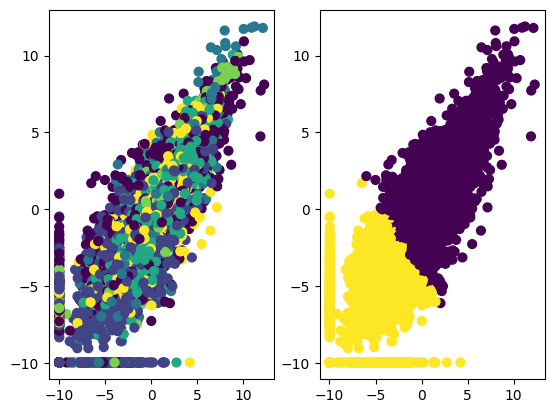

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# visualize the dataset
_, ax = plt.subplots(1, 2)
ax[0].scatter(data[:, 0], data[:, 1], c=cl, s=40)
# plt.waitforbuttonpress()

# run spectral clustering - tune n_cl and sigma!!!
sigma = 0.09
n_cl = len(set(cl))

labels = KMeans(n_clusters=2).fit_predict(data)

# visualize results
ax[1].scatter(data[:, 0], data[:, 1], c=labels, s=40)
plt.show()
#plt.savefig('kmeans_both_median.png')

In [ ]:
# Calculate distances to the main diagonal
distances = np.abs(data[:, 0] - data[:, 1])

# Sort distances in descending order
sorted_indices = np.argsort(distances)[::-1]

# Select the top 100 points
top_100_points = data[sorted_indices[:100]]

#NETWORK

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("TRAIN shape: ", X_train.shape)
print("TRAIN labels shape: ", y_train.shape)
print("Number of classes: ", len(y_train.unique()))

TRAIN shape:  (1600, 19962)
TRAIN labels shape:  (1600,)
Number of classes:  2


In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

features_in = X_train.shape[1]
n_classes = len(y_train.unique())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(features_in, 2048)
        self.conv2 = GCNConv(2048, 1024)
        self.conv3 = GCNConv(1024, 2)
        self.classifier = Linear(2, n_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()

        out = self.classifier(h)

        return out

model = GCN().double().to(device)
print(model)

GCN(
  (conv1): GCNConv(19962, 2048)
  (conv2): GCNConv(2048, 1024)
  (conv3): GCNConv(1024, 2)
  (classifier): Linear(in_features=2, out_features=2, bias=True)
)


In [ ]:
#BUILD CORRELATION MATRIXES
correlation_matrix_train = np.corrcoef(X_train)
correlation_matrix_test = np.corrcoef(X_test)
print("CORR_MATRIX TRAIN shape: ", correlation_matrix_train.shape)
print("CORR_MATRIX TEST shape: ", correlation_matrix_test.shape)

CORR_MATRIX TRAIN shape:  (1600, 1600)
CORR_MATRIX TEST shape:  (401, 401)


In [ ]:
#CONVERT ALL TO TENSORS
x_train = torch.from_numpy(X_train.values)
y_train = torch.from_numpy(y_train.values)
x_test = torch.from_numpy(X_test.values)
y_test = torch.from_numpy(y_test.values)
#correlation_matrix_train = torch.from_numpy(correlation_matrix_train)
#correlation_matrix_test = torch.from_numpy(correlation_matrix_test)

In [ ]:
threshold_edge = 0.9 #threshold to determine if two nodes are connected based on the correlation matrix

In [ ]:
#BUILD EDGE INDEX FOR TRAIN SET
mask = correlation_matrix_train > threshold_edge

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_train = torch.tensor([row_indices, col_indices], dtype=torch.int64)

print(edge_index_train.shape)

torch.Size([2, 822800])


<ipython-input-32-2d88378224f8>:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  edge_index_train = torch.tensor([row_indices, col_indices], dtype=torch.int64)


In [ ]:
#BUILD EDGE INDEX FOR TEST SET
mask = correlation_matrix_test > threshold_edge

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_test = torch.tensor([row_indices, col_indices], dtype=torch.int64)

print(edge_index_test.shape)

torch.Size([2, 50968])


In [ ]:
#TRAIN SETTINGS
import torch.optim as optim
import torch.nn as nn

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 250

In [ ]:
x_train = x_train.double().to(device)
edge_index_train = edge_index_train.to(device)
y_train = y_train.to(device)
x_test = x_test.double().to(device)
edge_index_test = edge_index_test.to(device)
y_test = y_test.to(device)

In [ ]:
import numpy as np

#TRAIN LOOP
for epoch in range(n_epochs):
    optimizer.zero_grad()
    out = model(x_train.double(), edge_index_train)
    loss = loss_fn(out, y_train)
    # backward pass
    loss.backward()
    if epoch % 10 == 0:
      print(f"EPOCH {epoch}, LOSS: {loss}")
    # update weights
    optimizer.step()

EPOCH 0, LOSS: 0.7319085824007652
EPOCH 10, LOSS: 0.5423928556938395
EPOCH 20, LOSS: 0.5418317871325493
EPOCH 30, LOSS: 0.5412743730394738
EPOCH 40, LOSS: 0.540722735305319
EPOCH 50, LOSS: 0.5401787209981282
EPOCH 60, LOSS: 0.5396429749151757
EPOCH 70, LOSS: 0.5391168636727603
EPOCH 80, LOSS: 0.5386001823548213
EPOCH 90, LOSS: 0.538093004856006
EPOCH 100, LOSS: 0.5375953747543444
EPOCH 110, LOSS: 0.5371072856640704
EPOCH 120, LOSS: 0.536628696478969
EPOCH 130, LOSS: 0.5361595418853716
EPOCH 140, LOSS: 0.5356997394592036
EPOCH 150, LOSS: 0.5352491945156579
EPOCH 160, LOSS: 0.5348078034664799
EPOCH 170, LOSS: 0.5343754563522576
EPOCH 180, LOSS: 0.5339520389444392
EPOCH 190, LOSS: 0.5335374332619512
EPOCH 200, LOSS: 0.5331315187188788
EPOCH 210, LOSS: 0.5327341734963857
EPOCH 220, LOSS: 0.5323452749457342
EPOCH 230, LOSS: 0.5319646999104062
EPOCH 240, LOSS: 0.5315923248863551


In [ ]:
#TEST
model.eval()
out = model(x_test, edge_index_test)
pred = out.argmax(dim=1)  #Use the class with highest probability.
print(pred)
print(y_test)
test_correct = pred == y_test
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy on test set: {}".format(test_acc))

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/BioInfo/model_weights.pth')

#Evaluating biomarkers tumor

In [ ]:
sorted_indices

array([ 2310, 13609, 18604, ...,  9986, 17240, 19201])

In [ ]:
top_100_points

array([[ 4.20809862e+00, -9.96578428e+00],
       [ 2.75333514e+00, -9.96578428e+00],
       [ 1.50245327e+00, -9.96578428e+00],
       [ 1.33366566e+00, -9.96578428e+00],
       [ 1.27072547e+00, -9.96578428e+00],
       [-9.96578428e+00,  1.00927550e+00],
       [ 2.08572489e-01, -9.96578428e+00],
       [-8.82739805e-03, -9.96578428e+00],
       [-1.09204149e-01, -9.96578428e+00],
       [-4.49001268e-01, -9.96578428e+00],
       [-9.96578428e+00, -4.72329084e-01],
       [-9.96578428e+00, -5.36168320e-01],
       [-8.92391470e-01, -9.96578428e+00],
       [-1.04468727e+00, -9.96578428e+00],
       [-1.06084930e+00, -9.96578428e+00],
       [-1.10392215e+00, -9.96578428e+00],
       [-9.96578428e+00, -1.13289427e+00],
       [-1.15665936e+00, -9.96578428e+00],
       [-1.23753520e+00, -9.96578428e+00],
       [-1.26170899e+00, -9.96578428e+00],
       [-1.28156175e+00, -9.96578428e+00],
       [-1.38629014e+00, -9.96578428e+00],
       [-1.40373827e+00, -9.96578428e+00],
       [-1.

In [ ]:
df_tumor_restricted = df_tumor[:df_normal.shape[0]]
df_tumor_restricted

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,4.547499,-9.965784,4.686747,0.641916,0.143916,0.695638,2.940843,3.940355,1.901070,3.875269,...,-9.965784,-9.965784,-4.085589,-9.965784,-9.965784,-5.861448,-9.965784,-9.965784,-1.332426,1
418,1.970486,-3.406598,4.756458,2.357552,2.259152,1.909504,4.251992,3.848257,5.181596,3.911366,...,-9.965784,-6.947862,-3.412731,-9.965784,-9.965784,-9.965784,-9.965784,-4.604718,-3.110293,1
419,4.525280,-3.708396,4.221599,1.785132,0.269392,1.421695,4.826726,2.890875,1.487795,3.542221,...,-9.965784,-9.965784,-4.695255,-3.685942,-9.965784,-9.965784,-9.965784,-4.691523,-4.869860,1
420,3.996217,-9.965784,4.876939,0.774249,0.633850,2.717934,2.961327,3.623047,2.405938,3.232031,...,-9.965784,-6.546245,0.025312,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-2.300448,1


In [ ]:
y_test = df_tumor_restricted['tumor']
y_test = torch.from_numpy(y_test.values).to(device)

In [ ]:
X_test = df_tumor_restricted.drop('tumor', axis=1).values
x_test = torch.from_numpy(X_test).double().to(device)

In [ ]:
x_test

tensor([[ 3.4867, -9.9658,  5.1728,  ..., -9.9658, -8.5328, -2.3350],
        [ 3.5635, -9.9658,  5.5051,  ..., -9.9658, -5.8699, -2.1072],
        [ 3.4146, -9.9658,  4.8760,  ..., -9.9658, -8.3335, -0.0574],
        ...,
        [ 4.5253, -3.7084,  4.2216,  ..., -9.9658, -4.6915, -4.8699],
        [ 3.9962, -9.9658,  4.8769,  ..., -9.9658, -9.9658, -2.3004],
        [ 2.5685, -9.9658,  4.4917,  ..., -9.9658, -5.7642, -2.9965]],
       dtype=torch.float64)

In [ ]:
correlation_matrix_test = np.corrcoef(X_test)

In [ ]:
#BUILD EDGE INDEX FOR TEST SET
mask = correlation_matrix_test > 0.9

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_test = torch.tensor([row_indices, col_indices], dtype=torch.int64).to(device)

print(edge_index_test.shape)

torch.Size([2, 59494])


In [ ]:
#TEST
model.eval()
out = model(x_test, edge_index_test)
pred = out.argmax(dim=1)  #Use the class with highest probability.
print(pred)
print(y_test)
test_correct = pred == y_test
print(test_correct)
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy on test set: {}".format(test_acc))

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#Evaluating biomarkers tumor modified

In [ ]:
sorted_indices

array([ 2310, 13609, 18604, ...,  9986, 17240, 19201])

In [ ]:
top_100_points

array([[ 4.20809862e+00, -9.96578428e+00],
       [ 2.75333514e+00, -9.96578428e+00],
       [ 1.50245327e+00, -9.96578428e+00],
       [ 1.33366566e+00, -9.96578428e+00],
       [ 1.27072547e+00, -9.96578428e+00],
       [-9.96578428e+00,  1.00927550e+00],
       [ 2.08572489e-01, -9.96578428e+00],
       [-8.82739805e-03, -9.96578428e+00],
       [-1.09204149e-01, -9.96578428e+00],
       [-4.49001268e-01, -9.96578428e+00],
       [-9.96578428e+00, -4.72329084e-01],
       [-9.96578428e+00, -5.36168320e-01],
       [-8.92391470e-01, -9.96578428e+00],
       [-1.04468727e+00, -9.96578428e+00],
       [-1.06084930e+00, -9.96578428e+00],
       [-1.10392215e+00, -9.96578428e+00],
       [-9.96578428e+00, -1.13289427e+00],
       [-1.15665936e+00, -9.96578428e+00],
       [-1.23753520e+00, -9.96578428e+00],
       [-1.26170899e+00, -9.96578428e+00],
       [-1.28156175e+00, -9.96578428e+00],
       [-1.38629014e+00, -9.96578428e+00],
       [-1.40373827e+00, -9.96578428e+00],
       [-1.

In [ ]:
df_tumor_modified = df_tumor[:df_normal.shape[0]]
df_tumor_modified

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,4.547499,-9.965784,4.686747,0.641916,0.143916,0.695638,2.940843,3.940355,1.901070,3.875269,...,-9.965784,-9.965784,-4.085589,-9.965784,-9.965784,-5.861448,-9.965784,-9.965784,-1.332426,1
418,1.970486,-3.406598,4.756458,2.357552,2.259152,1.909504,4.251992,3.848257,5.181596,3.911366,...,-9.965784,-6.947862,-3.412731,-9.965784,-9.965784,-9.965784,-9.965784,-4.604718,-3.110293,1
419,4.525280,-3.708396,4.221599,1.785132,0.269392,1.421695,4.826726,2.890875,1.487795,3.542221,...,-9.965784,-9.965784,-4.695255,-3.685942,-9.965784,-9.965784,-9.965784,-4.691523,-4.869860,1
420,3.996217,-9.965784,4.876939,0.774249,0.633850,2.717934,2.961327,3.623047,2.405938,3.232031,...,-9.965784,-6.546245,0.025312,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-2.300448,1


In [ ]:
df_tumor_modified = df_normal
#df_tumor_modified.iloc[:, sorted_indices[:1000]] = df_normal.iloc[:, sorted_indices[:1000]]
df_tumor_modified

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.741855,-3.582080,4.487744,2.227464,0.619929,4.408603,3.924242,3.727376,2.603312,3.131096,...,-9.965784,-5.351074,-3.269512,-2.568324,-9.965784,-6.861448,-9.965784,-4.030325,-3.187050,0
418,2.905447,-2.944527,4.775999,2.173863,0.614286,3.906843,5.260786,3.542456,1.790105,3.017726,...,-9.965784,-6.532825,-4.662004,-9.965784,-9.965784,-9.965784,-9.965784,-3.791857,-3.129103,0
419,2.286112,-3.334971,4.482906,1.199625,-0.432844,4.743537,5.973593,4.443898,1.535804,2.917031,...,-9.965784,-6.601212,-0.509225,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-3.519528,0
420,2.502203,-1.708396,4.277464,1.931986,0.525868,4.049622,4.844978,3.213938,1.471708,3.064745,...,-9.965784,-9.965784,-6.200250,-9.965784,-9.965784,-9.965784,-9.965784,-4.643856,-2.888969,0


In [ ]:
y_test = df_normal['tumor']
y_test = torch.from_numpy(y_test.values).to(device)

In [ ]:
X_test = df_tumor_modified.drop('tumor', axis=1).values
x_test = torch.from_numpy(X_test).double().to(device)

In [ ]:
X_test

array([[ 4.33955787, -5.12784104,  4.54214659, ..., -9.96578428,
        -6.04930764, -3.92796282],
       [ 2.6593766 , -1.93456555,  4.51134153, ..., -9.96578428,
        -4.60823228, -2.92357772],
       [ 2.37934371, -5.22701645,  4.28217289, ..., -9.96578428,
        -9.96578428, -3.45324133],
       ...,
       [ 2.28611229, -3.33497113,  4.48290635, ..., -9.96578428,
        -5.29335894, -3.51952805],
       [ 2.50220328, -1.70839644,  4.27746409, ..., -9.96578428,
        -4.64385619, -2.88896869],
       [ 2.20470416, -3.11029284,  4.38447813, ..., -9.96578428,
        -5.74855357, -4.02326978]])

In [ ]:
x_test

tensor([[ 4.3396, -5.1278,  4.5421,  ..., -9.9658, -6.0493, -3.9280],
        [ 2.6594, -1.9346,  4.5113,  ..., -9.9658, -4.6082, -2.9236],
        [ 2.3793, -5.2270,  4.2822,  ..., -9.9658, -9.9658, -3.4532],
        ...,
        [ 2.2861, -3.3350,  4.4829,  ..., -9.9658, -5.2934, -3.5195],
        [ 2.5022, -1.7084,  4.2775,  ..., -9.9658, -4.6439, -2.8890],
        [ 2.2047, -3.1103,  4.3845,  ..., -9.9658, -5.7486, -4.0233]],
       dtype=torch.float64)

In [ ]:
correlation_matrix_test = np.corrcoef(X_test)

In [ ]:
#BUILD EDGE INDEX FOR TEST SET
mask = correlation_matrix_test > 0.9

#Exclude the diagonal elements (assuming the matrix is square)
np.fill_diagonal(mask, False)

#Get the row and column indices where the mask is True
row_indices, col_indices = np.where(mask)

#Create the edge_index tensor
edge_index_test = torch.tensor([row_indices, col_indices], dtype=torch.int64).to(device)

print(edge_index_test.shape)

torch.Size([2, 170864])


In [ ]:
#TEST
model.eval()
out = model(x_test, edge_index_test)
pred = out.argmax(dim=1)  #Use the class with highest probability.
print(pred)
print(y_test)
test_correct = pred == y_test
print(test_correct)
test_acc = int(test_correct.sum()) / len(test_correct)
print("Accuracy on test set: {}".format(test_acc))

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
out

tensor([[0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5441, 1.4679],
        [0.5